In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv("C:/Users/waghm/Downloads/Customers.csv")
products_df = pd.read_csv("C:/Users/waghm/Downloads/Products.csv")
transactions_df = pd.read_csv("C:/Users/waghm/Downloads/Transactions.csv")

In [3]:
# Merge transaction data with customer data
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

In [4]:
# Feature Engineering
# Aggregate transaction data to get total spend, number of transactions per customer, etc.
customer_features = merged_df.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [5]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['total_spend', 'transaction_count', 'avg_transaction_value']])

In [6]:
# Clustering (KMeans example)
kmeans = KMeans(n_clusters=4, random_state=42) 
customer_features['cluster'] = kmeans.fit_predict(scaled_features)

In [7]:
# Evaluate clustering performance using DB Index
db_index = davies_bouldin_score(scaled_features, customer_features['cluster'])
print(f"DB Index: {db_index}")

DB Index: 1.0604240399923033


In [8]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

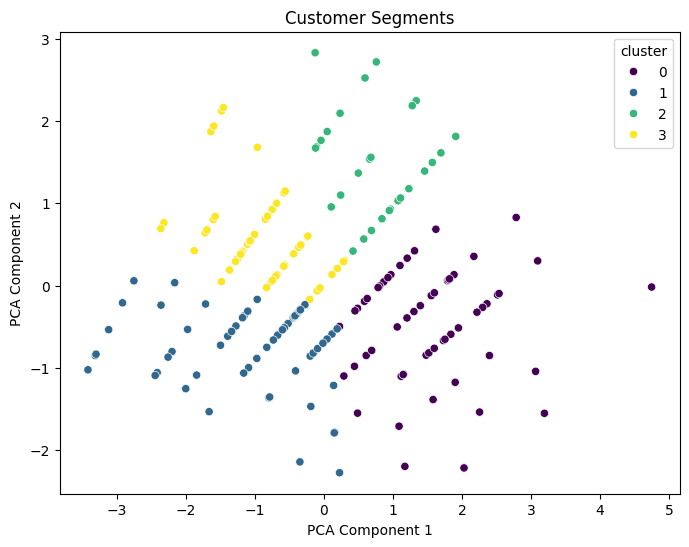

In [9]:
# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_features['cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_features, customer_features['cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.3135106549790539
